# 10 Regimen Mice Study
---

### Analysis

- Looking at the distribution of the sexes of the test mice, we can feel confident that the sex of the  mouse subject and it's related attributes hasn't skewed our dataset.
- Although the number of mice tested was not exactly the same per regimen, I do think that the total mice test per regimen was approximate and that it offers a fair representation to each treatment regimen. 
- Of the four drug regimens that I analysed in detail Capomulin, Ramicane resulted in far smaller final tumor volumes, almost falling completely below the lower limit of Infubinol, and Ceftamin. 
- Looking closely at a single mouse on the Capomulin treatment, it was successful at shrinking the tumor of the mouse by 50%.
- As shown by my final scatter plot and line regression there is a strong positve correlation between the weight of the mouse subject and and it's tumor volume. 

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
from numpy import mean, median, std, var


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
combined_df.nunique()['Mouse ID']

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df[combined_df.duplicated()]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df.loc[combined_df['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
    #wouldn't we want to keep one instance of this data and not drop both?

clean_df = combined_df[combined_df['Mouse ID'] != 'g989']

#This is a way to drop not using the ID #   
    # clean_df = combined_df.drop(combined_df[combined_df.duplicated()].index)


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df.nunique()['Mouse ID']

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
t_mean = clean_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
t_median = clean_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
t_var = clean_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
t_std = clean_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']    
t_sem = clean_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']
# Assemble the resulting series into a single summary DataFrame.
long_drug_df = pd.DataFrame({'Mean Tumor Volume':t_mean,'Median Tumor Volume':t_median,'Tumor Volume Variance':t_var,
'Tumor Volume Std. Dev.':t_std,'Tumor Volume Std. Err.':t_sem},index= t_mean.index)

long_drug_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
drug_df= clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})

drug_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

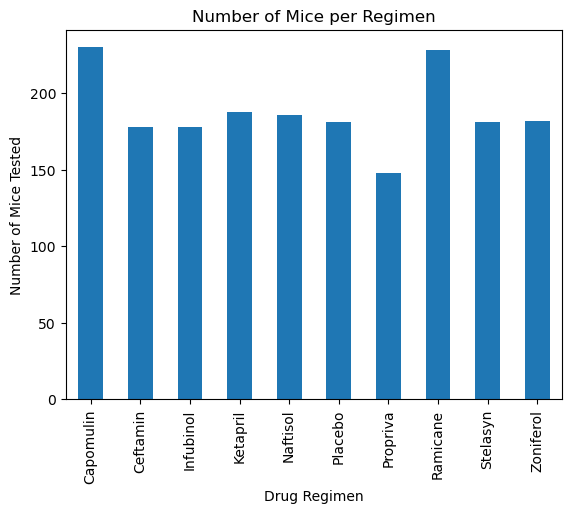

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

pd_drug_tp_counts = clean_df.groupby('Drug Regimen').count()['Timepoint']
pd_drug_tp_counts.plot.bar()
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.title('Number of Mice per Regimen')
plt.xticks(rotation='vertical')
plt.show()

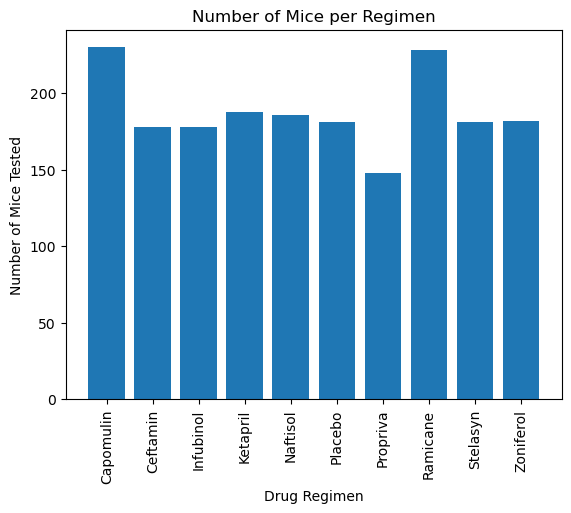

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_tp_counts = clean_df.groupby('Drug Regimen').count()['Timepoint']

drug_name_axis = drug_tp_counts.index
tp_count_axis = drug_tp_counts.values

plt.bar(drug_name_axis, tp_count_axis)
plt.xticks(drug_name_axis,rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.title('Number of Mice per Regimen')
plt.show()


<AxesSubplot:ylabel='Sex'>

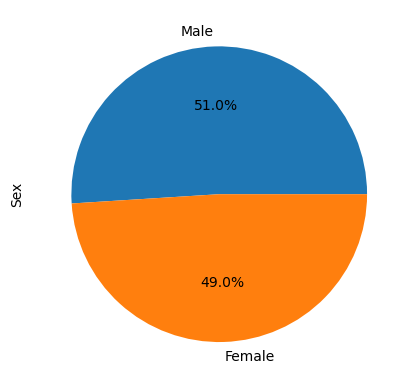

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pd_sex_counts = clean_df['Sex'].value_counts()
pd_sex_per = round(pd_sex_counts / pd_sex_counts.sum() * 100,1)
pd_sex_per.plot.pie(autopct='%1.1f%%')


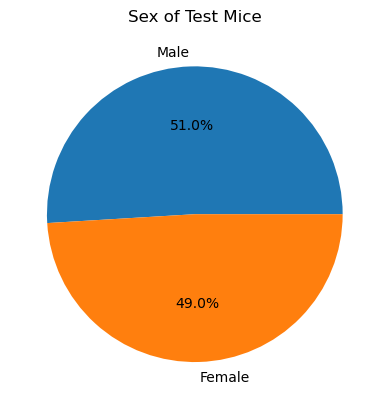

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = clean_df['Sex'].value_counts()
sex_per = round(sex_counts / sex_counts.sum() * 100,1)
sex_labels = sex_counts.index

plt.pie(sex_counts, labels=sex_labels,autopct='%1.1f%%')
plt.title('Sex of Test Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Using .isin which is a pandas method the gives a boolean mask which which then returns the True rows

four_regs_df = clean_df.loc[clean_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
# Grouped and sorted to get the last/max timepoint entry for each mouse ID
last_df = four_regs_df.sort_values('Timepoint')
last_df = last_df.groupby('Mouse ID').last()

# Merge this group df with the original clean df , DataFrame to get the tumor volume at the last timepoint
# My solution above gives the entire row which is what we are looking for here
last_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a275,Ceftamin,Female,20,28,45,62.999356,3
a411,Ramicane,Male,3,22,45,38.407618,1
a444,Ramicane,Female,10,25,45,43.047543,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

v_Capomulin = []
v_Ramicane = []
v_Infubinol = []
v_Ceftamin = []

for index, row in last_df.iterrows():
    if row['Drug Regimen'] == 'Capomulin':
        v_Capomulin.append(row['Tumor Volume (mm3)'])
    elif row['Drug Regimen'] == 'Ramicane':
        v_Ramicane.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == 'Infubinol':
        v_Infubinol.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == 'Ceftamin':
        v_Ceftamin.append(row['Tumor Volume (mm3)'])

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ca_q1 = np.percentile(v_Capomulin, 25)
ca_q3 = np.percentile(v_Capomulin, 75)
ca_irq = ca_q3 - ca_q1
outlier_min = ca_q3 - 1.5 * ca_irq
outlier_max = ca_q3 + 1.5 * ca_irq
v_outliers = [x for x in v_Capomulin if x < outlier_min or x > outlier_max]


r_q1 = np.percentile(v_Ramicane, 25)
r_q3 = np.percentile(v_Ramicane, 75)
r_irq = r_q3 - r_q1
outlier_min = r_q3 - 1.5 * r_irq
outlier_max = r_q3 + 1.5 * r_irq
v_outliers = [x for x in v_Ramicane if x < outlier_min or x > outlier_max]

c_q1 = np.percentile(v_Ceftamin, 25)
c_q3 = np.percentile(v_Ceftamin, 75)
c_irq = c_q3 - c_q1
outlier_min = c_q3 - 1.5 * c_irq
outlier_max = c_q3 + 1.5 * c_irq
v_outliers = [x for x in v_Ceftamin if x < outlier_min or x > outlier_max]

i_q1 = np.percentile(v_Infubinol, 25)
i_q3 = np.percentile(v_Infubinol, 75)
i_irq = i_q3 - i_q1
outlier_min = i_q3 - 1.5 * i_irq
outlier_max = i_q3 + 1.5 * i_irq
v_outliers = [x for x in v_Infubinol if x < outlier_min or x > outlier_max]


    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    

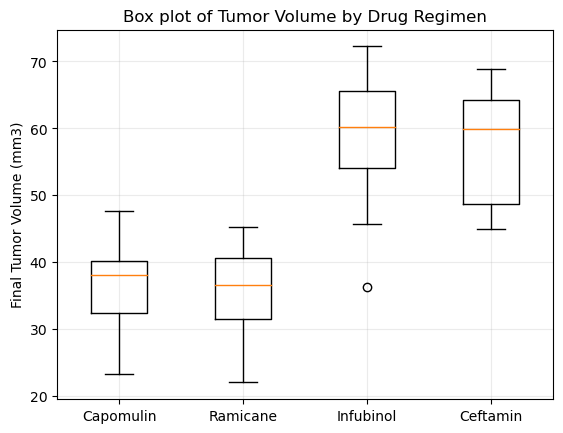

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

#setting the data variable to the volume lists
data = [v_Capomulin, v_Ramicane, v_Infubinol, v_Ceftamin]

#creating two variables, fig1 and ax1, which are handles to the figure and axis objects, respectively
fig1, ax1 = plt.subplots()
ax1.set_title('Box plot of Tumor Volume by Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(data, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.grid(alpha=0.25)
plt.show()


## Line and Scatter Plots

In [16]:

# combined_df.loc[combined_df['Drug Regimen']== 'Capomulin']
single_mouse_df = combined_df.loc[combined_df['Mouse ID']=='s185']
single_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


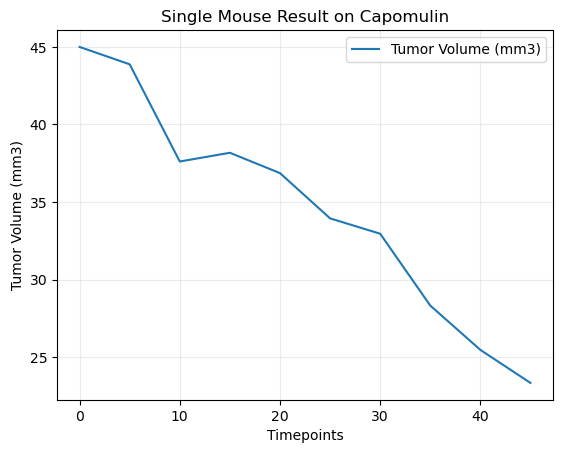

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
single_mouse_line = single_mouse_df.plot(kind='line', x='Timepoint',y='Tumor Volume (mm3)')

plt.title('Single Mouse Result on Capomulin')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoints')
plt.grid(alpha=0.25)
plt.show()

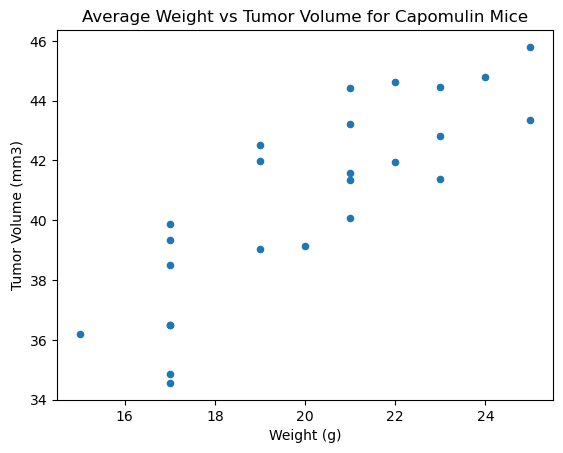

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capo_df = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']
weight_v_vol = capo_df.groupby('Mouse ID').agg({'Weight (g)':'mean', 'Tumor Volume (mm3)':'mean'})

weight_v_vol.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')

plt.title('Average Weight vs Tumor Volume for Capomulin Mice')

plt.show()




## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


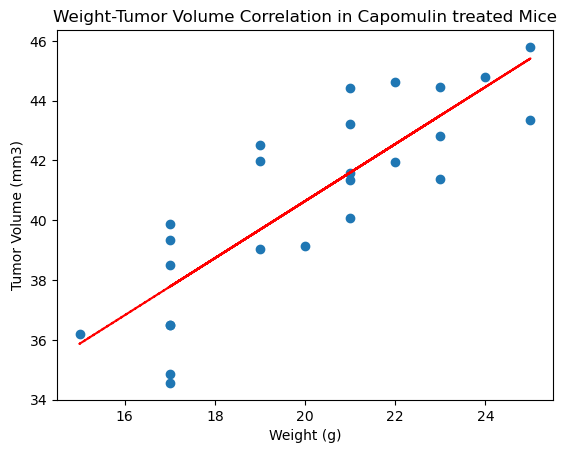

In [38]:
# Calculate the correlation coefficient and linear regression model 
correlation = weight_v_vol['Weight (g)'].corr(weight_v_vol['Tumor Volume (mm3)'])

x = weight_v_vol['Weight (g)']
y = weight_v_vol['Tumor Volume (mm3)']
correlation = round(st.pearsonr(x, y)[0],2)

# correlation = round(weight_v_vol['Weight (g)'].corr(weight_v_vol['Tumor Volume (mm3)']),2)
print(f'The correlation between mouse weight and the average tumor volume is {correlation}')

# scatter plot for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(x, y)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Weight-Tumor Volume Correlation in Capomulin treated Mice')

# Perform a linear regression on weight versus tumor volume
(wt_slope, wt_int, wt_r, wt_p, wt_std_err) = st.linregress(x, y)
# Create equation of line to calculate predicted results
wt_fit = wt_slope * x + wt_int

# Plot the linear model on top of scatter plot 
plt.plot(x,wt_fit,"r--")
plt.show()
